
~ HIT ~

After 6.84 seconds, the dart fired from the blow gun aimed 30.96 degrees above the x-axis,            

hits the monkey 70.52 meters above the ground after traveling 500 meters horizontally.



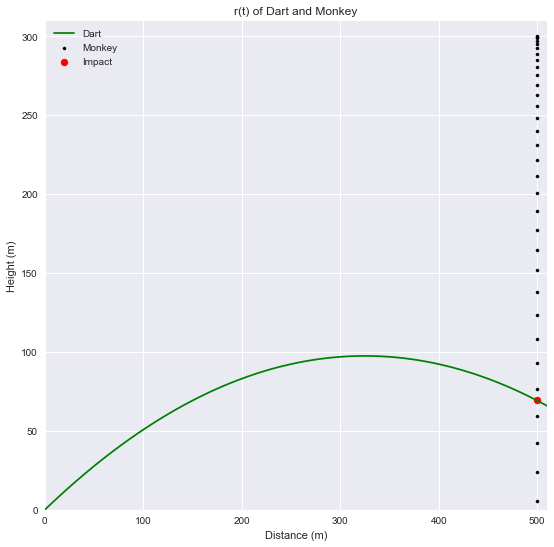


~ MISS ~

Initial velocity too low.

The dart fell 32.91 meters short after flying for 7.05 seconds.



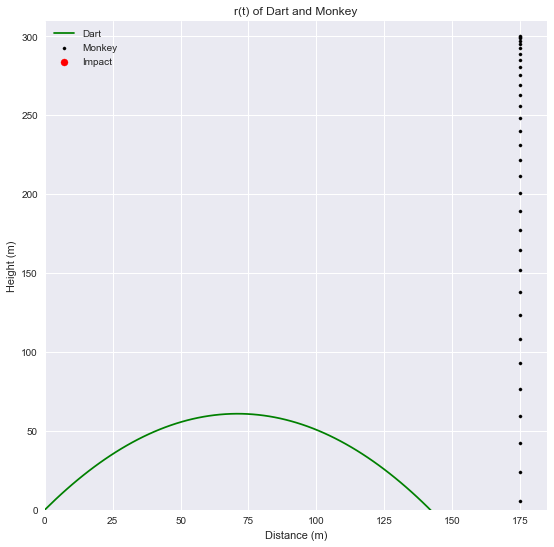

In [1]:
# This program simulates a blow gun aimed directly at a monkey no matter how far or high it is.
# You should be able to hit the monkey with proper inputs. 
# If you don't, then you need to blow harder.

# Enter any distance, height, and Vo.

# FIXED VALUES FOR GITHUB

import numpy as np 
import matplotlib.pyplot as plt

distance = 500
height = 300
monkey_height = 1
Vo = 85
angle = np.arctan(height/distance)

def y_monky(t):
    return height - ((9.81) * (t**2) / 2)   
def y_dart(t):
    return (Vo) * (np.sin(angle)) * t - ((9.81) * (t**2) / 2)
def x_dart(t):
    return (Vo) * (np.cos(angle)) * t

def experiment():
    
    t = np.arange(.01,500,0.01)
    x_d_t = 0
    
    # incorporating width of moneky into model
    Vx_scale = np.round(x_dart(t[2]),2)-np.round(x_dart(t[1]),2)
    error_dist = np.arange(distance-Vx_scale*2, distance+Vx_scale*2,.01)
    error_dist = [np.round(i,2) for i in error_dist]
    
    for i in t:
        if np.round(x_dart(i),2) in error_dist: 
            x_d_t = i
            break
    
    mon = np.round(y_monky(x_d_t), decimals = 2)
    dar = np.round(y_dart(x_d_t), decimals = 2)
    
    # incorporating height of monkey into model
    Vy_scale = np.round(x_dart(t[2]),2)-np.round(x_dart(t[1]),2)
    error_height = np.arange(mon-Vy_scale*2, mon+Vy_scale*2,0.01)
    error_height = [np.round(i,2) for i in error_height]
    
    # to see which particle hits the ground first
    test_mon = [np.round(y_monky(i),2) for i in t ]
    test_dart = [np.round(y_dart(i),2) for i in t ]
    xtest_dart = [np.round(x_dart(i),2) for i in t]
   
    if dar in error_height and dar > 0 :
        print()
        print("~ HIT ~")
        print()
        print("After {} seconds, the dart fired from the blow gun aimed {} degrees above the x-axis,\
            \n\nhits the monkey {} meters above the ground after traveling {} meters horizontally."
              .format(np.round(x_d_t,2),np.round(np.degrees(angle),2),np.round(y_monky(x_d_t),2),distance))
    else: 
        timer = 0
        for i in range(len(t)):
            if test_mon[i] and test_dart[i] > 0:
                timer += 1
            
        if test_mon[timer] > test_dart[timer] and xtest_dart[timer] < distance:
            print()
            print("~ MISS ~")
            print()
            print("Initial velocity too low.\n\nThe dart fell {} meters short after flying for {} seconds."\
                  .format(np.round(distance - x_dart(t[timer]),2),np.round(t[timer],2)))
            
    #plot
    x_dar = [x_dart(i) for i in np.arange(0,100,0.1)]
    y_dar = [y_dart(i) for i in np.arange(0,100,0.1)]
    x_mon = [distance for i in np.arange(0,100,.25)]
    y_mon = [y_monky(i) for i in np.arange(0,100,.25)]
            
    plt.style.use('seaborn')
    plt.figure(figsize=(9,9))
    plt.plot(x_dar,y_dar,c = 'g')
    plt.scatter(x_mon,y_mon,c = 'k',s = 10)
    plt.scatter(distance,y_dart(x_d_t),c = 'r',s =50)
    plt.ylim(0,height+10)
    plt.xlim(0,distance+10)
    plt.xlabel('Distance (m)')
    plt.ylabel('Height (m)')
    plt.title('r(t) of Dart and Monkey')
    plt.legend(['Dart','Monkey','Impact'])
    print()
    plt.show()
        
experiment()

distance = 175
height = 300
monkey_height = 1
Vo = 40
angle = np.arctan(height/distance)

experiment()